In [1]:
from os import path
from PIL import Image
import numpy as np
import pandas as pd
# from pandas.api.types import is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [2]:
tweets = pd.read_csv('../data/feat_tweets_201804051702.csv')
tweets_notrt = tweets[tweets['is_retweet'] == 0]
# reddits = pd.read_csv('../data/feat_rc_201804051702.csv')

In [3]:
tweets_notrt.shape

(49450, 14)

In [5]:
tweets.shape

(125964, 14)

In [4]:
def get_num_bad_per_1000(data, x=None, plt='bar'):
    if x:
        _res = data.groupby(x).apply(
            lambda row : sum(row['num_badwords'])/sum(row['num_words'])
        ) * 1000
        if plt == 'dist':
            pass
            #sns.distplot(_res)
        else:
            sns.barplot(x=_res.index, y=_res)
    else:
        _res = sum(data['num_badwords'])/sum(data['num_words']) * 1000
    return _res

source
Facebook               2.738614
Google                 1.006760
Hootsuite              1.553549
IFTTT                  0.862218
Instagram              1.391558
Other                  2.655282
TweetDeck              3.646006
Tweetbot for iΟS       5.374418
Twitter Lite           7.121165
Twitter Web Client     3.950812
Twitter for Android    6.158969
Twitter for iPad       4.343938
Twitter for iPhone     8.587221
dtype: float64

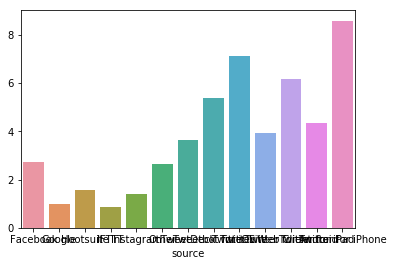

In [8]:
get_num_bad_per_1000(tweets_notrt, 'source')

weekday
0    5.377574
1    5.685442
2    6.135051
3    5.626443
4    6.041491
5    5.845776
6    5.395632
dtype: float64

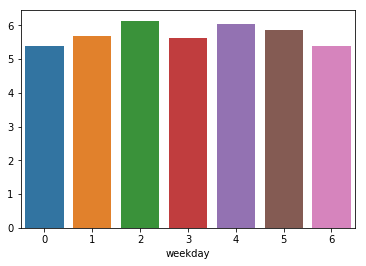

In [9]:
get_num_bad_per_1000(tweets_notrt, 'weekday')

city
chicago        8.746384
los_angeles    7.089923
new_york       5.966792
toronto        4.486840
vancouver      3.872342
dtype: float64

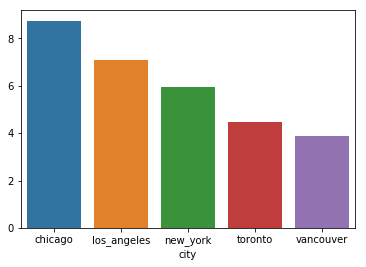

In [7]:
get_num_bad_per_1000(tweets_notrt, 'city')

city
chicago        73.361280
los_angeles    59.108955
new_york       49.658197
toronto        41.412579
vancouver      36.158950
dtype: float64


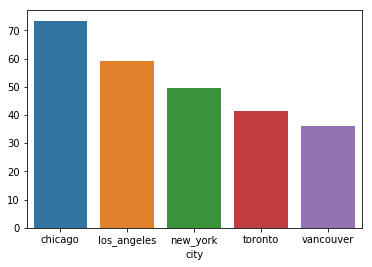

In [16]:
res = tweets_notrt[['city', 'num_badwords']].groupby('city').apply(
    lambda grp: sum(grp['num_badwords'] > 0)/len(grp['num_badwords']) * 1000
)
print(res)
sns.barplot(x=res.index, y=res);

In [12]:
wcld = WordCloud(
    background_color='white',
    max_words=200,
    max_font_size=60, 
    random_state=42
)
wcld.generate(
    ';'.join(
        tweets_notrt['badwords'][
            (tweets_notrt['badwords'].notnull())
            & (tweets_notrt['city'] == 'toronto')
        ]
    ).replace(' ', '_').replace(';', ' ')
);

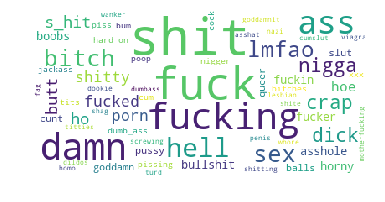

In [13]:
fig = plt.figure(1)
plt.imshow(wcld)
plt.axis('off')
plt.show()

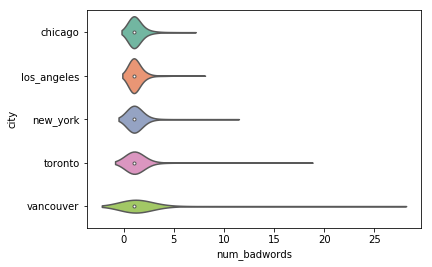

In [14]:
user_freq = tweets_notrt[['city', 'num_badwords', 'user']].groupby(
    ['city', 'user']
).sum()
sns.violinplot(
    y='city',
    x='num_badwords',
    data=user_freq[user_freq['num_badwords'] > 0].reset_index(),
    palette='Set2',
#     inner=None,
    bw=1
);

In [15]:
user_freq.groupby(level=0).apply(
    lambda grp: sum(grp['num_badwords'] > 0)/grp.shape[0]
)

city
chicago        0.092341
los_angeles    0.066180
new_york       0.056038
toronto        0.059008
vancouver      0.063158
dtype: float64

In [16]:
badword_freq = {}
for name, grp in tweets_notrt[['city', 'badwords']].groupby(['city']):
    _badwords, _counts = np.unique(np.array(
            ';'.join(grp['badwords'][grp['badwords'].notnull()]).split(';')
        ), return_counts=True)
    badword_freq[name] = dict(zip(_badwords, _counts))
# pd.DataFrame(badword_freq).reset_index().head()
badword_freq = pd.melt(
    pd.DataFrame(badword_freq).reset_index(),
    id_vars='index',
    var_name='city',
    value_name='count'
).dropna()
badword_freq.rename(columns={'index':'badword'}, inplace=True)
badword_freq.head()

,badword,city,count
0,anal,chicago,2.0
1,anus,chicago,1.0
3,ass,chicago,99.0
4,asses,chicago,1.0
6,asshole,chicago,4.0


In [21]:
# badword_freq.sort_values('count', ascending=False)
badword_freq[['badword', 'count']].groupby(['badword']).sum().sort_values('count', ascending=False)

,count
badword,
shit,435.0
fuck,280.0
ass,232.0
damn,229.0
fucking,227.0
hell,143.0
bitch,143.0
sex,96.0
lmfao,82.0


In [ ]:
from src.